In [1]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf

In [2]:
base_hyperparameters = {
    'learning_rate': 0.001,
    'batch_size': 16,
    'epochs': 300,
    'lstm_hidden_units': 8
}

learning_rate_vals = [0.0001, 0.001, 0.01]
batch_size_vals = [16, 64, 128]
lstm_hidden_units_vals = [8, 64, 256]

dsets = {}

for batch_size in batch_size_vals:
    dsets[f'train-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/train_dset-{batch_size}',
                                                             (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                              tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

    dsets[f'val-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/val_dset-{batch_size}',
                                                           (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                            tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

    dsets[f'test-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/test_dset-{batch_size}',
                                                            (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                             tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

In [3]:
def run_model(hyperparameters):
    lr_str = str(hyperparameters['learning_rate'])[2:]
    hyperparameter_string = f"{lr_str}-{hyperparameters['batch_size']}-{hyperparameters['epochs']}-{hyperparameters['lstm_hidden_units']}"
    print(hyperparameter_string)

    np.random.seed(0)
    tf.random.set_seed(0)

    num_hidden_units = hyperparameters['lstm_hidden_units']
    num_outputs = 7

    model = tf.keras.Sequential([
            tf.keras.Input(shape=(300, 171)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units,return_sequences=True)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units)),
            tf.keras.layers.Dense(num_outputs,activation='softmax')
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate'])
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    train_dset = dsets[f"train-{hyperparameters['batch_size']}"]
    val_dset = dsets[f"val-{hyperparameters['batch_size']}"]
    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=50, verbose=1)
    history = model.fit(train_dset,epochs=hyperparameters['epochs'],validation_data = val_dset,callbacks=[es])
    model.save(f"../models/model-{hyperparameter_string}")

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label="Train")
    plt.plot(history.history['val_loss'], label="Validation")
    plt.title("Loss Over Epoch")
    plt.xlabel("Loss")
    plt.ylabel("Epoch")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label="Train")
    plt.plot(history.history['val_accuracy'], label="Validation")
    plt.title("Accuracy Over Epoch")
    plt.xlabel("Accuracy")
    plt.ylabel("Epoch")
    plt.legend()
    plt.show()
    plt.savefig(f"../models/loss-accuracy-{hyperparameter_string}.png")

    plt.close()

def test_hyperparameters():
    for learning_rate in learning_rate_vals:
        hyperparameters = copy.deepcopy(base_hyperparameters)
        hyperparameters['learning_rate'] = learning_rate
        run_model(hyperparameters)

    for batch_size in batch_size_vals:
        hyperparameters = copy.deepcopy(base_hyperparameters)
        hyperparameters['batch_size'] = batch_size
        run_model(hyperparameters)

    for lstm_hidden_units in lstm_hidden_units_vals:
        hyperparameters = copy.deepcopy(base_hyperparameters)
        hyperparameters['lstm_hidden_units'] = lstm_hidden_units
        run_model(hyperparameters)

0001-16-300-8
Epoch 1/300
100/100 [==============================] - 24s 245ms/step - loss: 1.9631 - accuracy: 0.1238 - val_loss: 1.9397 - val_accuracy: 0.1400
Epoch 2/300
100/100 [==============================] - 23s 231ms/step - loss: 1.9384 - accuracy: 0.1456 - val_loss: 1.9315 - val_accuracy: 0.1700
Epoch 3/300
100/100 [==============================] - 23s 231ms/step - loss: 1.9310 - accuracy: 0.1600 - val_loss: 1.9267 - val_accuracy: 0.1650
Epoch 4/300
100/100 [==============================] - 23s 231ms/step - loss: 1.9264 - accuracy: 0.1644 - val_loss: 1.9243 - val_accuracy: 0.1600
Epoch 5/300
100/100 [==============================] - 23s 231ms/step - loss: 1.9207 - accuracy: 0.1663 - val_loss: 1.9222 - val_accuracy: 0.1450
Epoch 6/300
100/100 [==============================] - 23s 231ms/step - loss: 1.9218 - accuracy: 0.1631 - val_loss: 1.9225 - val_accuracy: 0.1500
Epoch 7/300
100/100 [==============================] - 23s 231ms/step - loss: 1.9185 - accuracy: 0.1669 - val_

Epoch 57/300
100/100 [==============================] - 23s 232ms/step - loss: 1.7507 - accuracy: 0.2862 - val_loss: 1.7678 - val_accuracy: 0.2700
Epoch 58/300
100/100 [==============================] - 23s 233ms/step - loss: 1.7312 - accuracy: 0.2969 - val_loss: 1.7304 - val_accuracy: 0.3400
Epoch 59/300
100/100 [==============================] - 23s 233ms/step - loss: 1.7240 - accuracy: 0.3088 - val_loss: 1.7149 - val_accuracy: 0.3250
Epoch 60/300
100/100 [==============================] - 23s 232ms/step - loss: 1.6959 - accuracy: 0.3300 - val_loss: 1.6719 - val_accuracy: 0.3550
Epoch 61/300
100/100 [==============================] - 23s 232ms/step - loss: 1.6766 - accuracy: 0.3450 - val_loss: 1.6683 - val_accuracy: 0.3450
Epoch 62/300
100/100 [==============================] - 23s 232ms/step - loss: 1.7790 - accuracy: 0.2988 - val_loss: 1.8739 - val_accuracy: 0.2200
Epoch 63/300
100/100 [==============================] - 23s 232ms/step - loss: 1.7593 - accuracy: 0.3119 - val_loss: 1

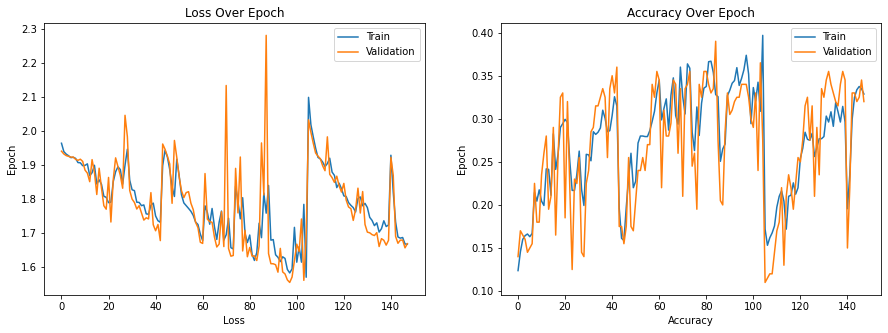

001-16-300-8
Epoch 1/300
100/100 [==============================] - 24s 245ms/step - loss: 1.9542 - accuracy: 0.1375 - val_loss: 1.9414 - val_accuracy: 0.1850
Epoch 2/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9398 - accuracy: 0.1669 - val_loss: 1.9444 - val_accuracy: 0.1250
Epoch 3/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9356 - accuracy: 0.1644 - val_loss: 1.9262 - val_accuracy: 0.1500
Epoch 4/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9263 - accuracy: 0.1713 - val_loss: 1.9265 - val_accuracy: 0.1300
Epoch 5/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9215 - accuracy: 0.1762 - val_loss: 1.9463 - val_accuracy: 0.1200
Epoch 6/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9171 - accuracy: 0.1875 - val_loss: 1.9476 - val_accuracy: 0.1150
Epoch 7/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9251 - accuracy: 0.1869 - val_l

Epoch 57/300
100/100 [==============================] - 23s 233ms/step - loss: 1.5024 - accuracy: 0.4006 - val_loss: 1.7397 - val_accuracy: 0.2750
Epoch 58/300
100/100 [==============================] - 23s 232ms/step - loss: 1.4831 - accuracy: 0.4025 - val_loss: 1.4532 - val_accuracy: 0.4350
Epoch 59/300
100/100 [==============================] - 23s 232ms/step - loss: 1.4666 - accuracy: 0.4256 - val_loss: 1.5005 - val_accuracy: 0.4250
Epoch 60/300
100/100 [==============================] - 23s 232ms/step - loss: 1.4865 - accuracy: 0.3862 - val_loss: 1.4447 - val_accuracy: 0.4150
Epoch 61/300
100/100 [==============================] - 23s 233ms/step - loss: 1.4821 - accuracy: 0.4112 - val_loss: 1.9559 - val_accuracy: 0.2250
Epoch 62/300
100/100 [==============================] - 23s 233ms/step - loss: 1.4503 - accuracy: 0.4169 - val_loss: 1.4215 - val_accuracy: 0.4050
Epoch 63/300
100/100 [==============================] - 23s 233ms/step - loss: 1.7451 - accuracy: 0.2919 - val_loss: 1

100/100 [==============================] - 23s 233ms/step - loss: 1.4937 - accuracy: 0.4494 - val_loss: 1.5617 - val_accuracy: 0.3200
Epoch 168/300
100/100 [==============================] - 23s 232ms/step - loss: 1.3529 - accuracy: 0.4631 - val_loss: 1.4422 - val_accuracy: 0.3900
Epoch 169/300
100/100 [==============================] - 23s 231ms/step - loss: 1.2334 - accuracy: 0.5375 - val_loss: 1.3513 - val_accuracy: 0.4900
Epoch 170/300
100/100 [==============================] - 23s 232ms/step - loss: 1.1268 - accuracy: 0.5838 - val_loss: 1.2678 - val_accuracy: 0.5050
Epoch 171/300
100/100 [==============================] - 23s 231ms/step - loss: 1.0892 - accuracy: 0.5938 - val_loss: 1.2018 - val_accuracy: 0.5750
Epoch 172/300
100/100 [==============================] - 23s 232ms/step - loss: 1.0852 - accuracy: 0.5944 - val_loss: 1.2012 - val_accuracy: 0.5600
Epoch 173/300
100/100 [==============================] - 23s 232ms/step - loss: 1.0597 - accuracy: 0.6062 - val_loss: 1.2627 -

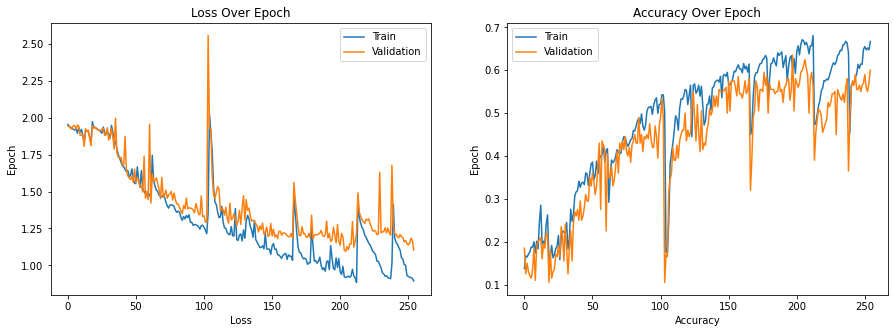

01-16-300-8
Epoch 1/300
100/100 [==============================] - 25s 247ms/step - loss: 1.9623 - accuracy: 0.1450 - val_loss: 1.9626 - val_accuracy: 0.1050
Epoch 2/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9492 - accuracy: 0.1425 - val_loss: 1.9577 - val_accuracy: 0.1050
Epoch 3/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9479 - accuracy: 0.1519 - val_loss: 1.9524 - val_accuracy: 0.1050
Epoch 4/300
100/100 [==============================] - 23s 234ms/step - loss: 1.9388 - accuracy: 0.1550 - val_loss: 1.9333 - val_accuracy: 0.1200
Epoch 11/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9381 - accuracy: 0.1581 - val_loss: 1.9362 - val_accuracy: 0.1800
Epoch 12/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9365 - accuracy: 0.1575 - val_loss: 1.9302 - val_accuracy: 0.1200
Epoch 13/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9366 - accuracy: 0.1594 - val

Epoch 63/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9449 - accuracy: 0.1500 - val_loss: 1.9411 - val_accuracy: 0.1050
Epoch 64/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9448 - accuracy: 0.1500 - val_loss: 1.9408 - val_accuracy: 0.1050
Epoch 65/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9448 - accuracy: 0.1506 - val_loss: 1.9406 - val_accuracy: 0.1050
Epoch 66/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9447 - accuracy: 0.1519 - val_loss: 1.9404 - val_accuracy: 0.1050
Epoch 67/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9446 - accuracy: 0.1513 - val_loss: 1.9402 - val_accuracy: 0.1050
Epoch 68/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9446 - accuracy: 0.1488 - val_loss: 1.9400 - val_accuracy: 0.1050
Epoch 69/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9445 - accuracy: 0.1469 - val_loss: 1

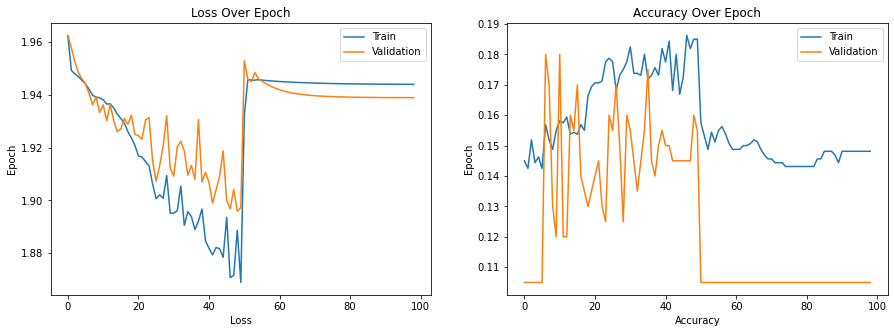

001-16-300-8
Epoch 1/300
100/100 [==============================] - 25s 245ms/step - loss: 1.9542 - accuracy: 0.1375 - val_loss: 1.9414 - val_accuracy: 0.1850
Epoch 2/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9398 - accuracy: 0.1669 - val_loss: 1.9444 - val_accuracy: 0.1250
Epoch 3/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9356 - accuracy: 0.1644 - val_loss: 1.9262 - val_accuracy: 0.1500
Epoch 4/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9263 - accuracy: 0.1713 - val_loss: 1.9265 - val_accuracy: 0.1300
Epoch 5/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9215 - accuracy: 0.1762 - val_loss: 1.9463 - val_accuracy: 0.1200
Epoch 6/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9171 - accuracy: 0.1875 - val_loss: 1.9476 - val_accuracy: 0.1150
Epoch 7/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9251 - accuracy: 0.1869 - val_l

Epoch 57/300
100/100 [==============================] - 23s 232ms/step - loss: 1.5024 - accuracy: 0.4006 - val_loss: 1.7397 - val_accuracy: 0.2750
Epoch 58/300
100/100 [==============================] - 23s 233ms/step - loss: 1.4831 - accuracy: 0.4025 - val_loss: 1.4532 - val_accuracy: 0.4350
Epoch 59/300
100/100 [==============================] - 23s 233ms/step - loss: 1.4666 - accuracy: 0.4256 - val_loss: 1.5005 - val_accuracy: 0.4250
Epoch 60/300
100/100 [==============================] - 23s 233ms/step - loss: 1.4865 - accuracy: 0.3862 - val_loss: 1.4447 - val_accuracy: 0.4150
Epoch 61/300
100/100 [==============================] - 23s 233ms/step - loss: 1.4821 - accuracy: 0.4112 - val_loss: 1.9559 - val_accuracy: 0.2250
Epoch 62/300
100/100 [==============================] - 23s 233ms/step - loss: 1.4503 - accuracy: 0.4169 - val_loss: 1.4215 - val_accuracy: 0.4050
Epoch 63/300
100/100 [==============================] - 23s 232ms/step - loss: 1.7451 - accuracy: 0.2919 - val_loss: 1

100/100 [==============================] - 23s 232ms/step - loss: 1.4937 - accuracy: 0.4494 - val_loss: 1.5617 - val_accuracy: 0.3200
Epoch 168/300
100/100 [==============================] - 23s 233ms/step - loss: 1.3529 - accuracy: 0.4631 - val_loss: 1.4422 - val_accuracy: 0.3900
Epoch 169/300
100/100 [==============================] - 23s 232ms/step - loss: 1.2334 - accuracy: 0.5375 - val_loss: 1.3513 - val_accuracy: 0.4900
Epoch 170/300
100/100 [==============================] - 23s 232ms/step - loss: 1.1268 - accuracy: 0.5838 - val_loss: 1.2678 - val_accuracy: 0.5050
Epoch 171/300
100/100 [==============================] - 23s 232ms/step - loss: 1.0892 - accuracy: 0.5938 - val_loss: 1.2018 - val_accuracy: 0.5750
Epoch 172/300
100/100 [==============================] - 23s 232ms/step - loss: 1.0852 - accuracy: 0.5944 - val_loss: 1.2012 - val_accuracy: 0.5600
Epoch 173/300
100/100 [==============================] - 23s 232ms/step - loss: 1.0597 - accuracy: 0.6062 - val_loss: 1.2627 -

KeyboardInterrupt: 

In [4]:
test_hyperparameters()

In [11]:
base_hyperparameters = {
    'learning_rate': 0.001,
    'batch_size': 16,
    'epochs': 300,
    'lstm_hidden_units': 8
}

# learning_rate_vals = [0.0001, 0.001, 0.01]
batch_size_vals = [64, 128]
lstm_hidden_units_vals = [8, 64, 256]

dsets = {}

for batch_size in batch_size_vals:
    dsets[f'train-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/train_dset-{batch_size}',
                                                             (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                              tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

    dsets[f'val-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/val_dset-{batch_size}',
                                                           (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                            tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

    dsets[f'test-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/test_dset-{batch_size}',
                                                            (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                             tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

In [12]:
def run_model(hyperparameters):
    lr_str = str(hyperparameters['learning_rate'])[2:]
    hyperparameter_string = f"{lr_str}-{hyperparameters['batch_size']}-{hyperparameters['epochs']}-{hyperparameters['lstm_hidden_units']}"
    print(hyperparameter_string)

    np.random.seed(0)
    tf.random.set_seed(0)

    num_hidden_units = hyperparameters['lstm_hidden_units']
    num_outputs = 7

    model = tf.keras.Sequential([
            tf.keras.Input(shape=(300, 171)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units,return_sequences=True)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units)),
            tf.keras.layers.Dense(num_outputs,activation='softmax')
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate'])
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    train_dset = dsets[f"train-{hyperparameters['batch_size']}"]
    val_dset = dsets[f"val-{hyperparameters['batch_size']}"]
    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=50, verbose=1)
    history = model.fit(train_dset,epochs=hyperparameters['epochs'],validation_data = val_dset,callbacks=[es])
    model.save(f"../models/model-{hyperparameter_string}")

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label="Train")
    plt.plot(history.history['val_loss'], label="Validation")
    plt.title("Loss Over Epoch")
    plt.xlabel("Loss")
    plt.ylabel("Epoch")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label="Train")
    plt.plot(history.history['val_accuracy'], label="Validation")
    plt.title("Accuracy Over Epoch")
    plt.xlabel("Accuracy")
    plt.ylabel("Epoch")
    plt.legend()
    plt.show()
    plt.savefig(f"../models/loss-accuracy-{hyperparameter_string}.png")

    plt.close()

def test_hyperparameters():
#     for learning_rate in learning_rate_vals:
#         hyperparameters = copy.deepcopy(base_hyperparameters)
#         hyperparameters['learning_rate'] = learning_rate
#         run_model(hyperparameters)

    for batch_size in batch_size_vals:
        hyperparameters = copy.deepcopy(base_hyperparameters)
        hyperparameters['batch_size'] = batch_size
        run_model(hyperparameters)

    for lstm_hidden_units in lstm_hidden_units_vals:
        hyperparameters = copy.deepcopy(base_hyperparameters)
        hyperparameters['lstm_hidden_units'] = lstm_hidden_units
        run_model(hyperparameters)

001-64-300-8
Epoch 1/300
25/25 [==============================] - 9s 342ms/step - loss: 1.9535 - accuracy: 0.1506 - val_loss: 1.9225 - val_accuracy: 0.2000
Epoch 2/300
25/25 [==============================] - 6s 249ms/step - loss: 1.9334 - accuracy: 0.1737 - val_loss: 1.9159 - val_accuracy: 0.2300
Epoch 3/300
25/25 [==============================] - 6s 245ms/step - loss: 1.9271 - accuracy: 0.1650 - val_loss: 1.9112 - val_accuracy: 0.2400
Epoch 4/300
25/25 [==============================] - 6s 247ms/step - loss: 1.9216 - accuracy: 0.1838 - val_loss: 1.9176 - val_accuracy: 0.2050
Epoch 5/300
25/25 [==============================] - 6s 246ms/step - loss: 1.9176 - accuracy: 0.1950 - val_loss: 1.9122 - val_accuracy: 0.2000
Epoch 6/300
25/25 [==============================] - 6s 244ms/step - loss: 1.9067 - accuracy: 0.2256 - val_loss: 1.8801 - val_accuracy: 0.2050
Epoch 7/300
25/25 [==============================] - 6s 246ms/step - loss: 1.8798 - accuracy: 0.2262 - val_loss: 1.8533 - val_acc

Epoch 58/300
25/25 [==============================] - 6s 247ms/step - loss: 1.6656 - accuracy: 0.3431 - val_loss: 1.6748 - val_accuracy: 0.3200
Epoch 59/300
25/25 [==============================] - 6s 245ms/step - loss: 1.6490 - accuracy: 0.3438 - val_loss: 1.6318 - val_accuracy: 0.3100
Epoch 60/300
25/25 [==============================] - 6s 247ms/step - loss: 1.6438 - accuracy: 0.3481 - val_loss: 1.6967 - val_accuracy: 0.3350
Epoch 61/300
25/25 [==============================] - 6s 247ms/step - loss: 1.6334 - accuracy: 0.3456 - val_loss: 1.6058 - val_accuracy: 0.3500
Epoch 62/300
25/25 [==============================] - 6s 248ms/step - loss: 1.6246 - accuracy: 0.3587 - val_loss: 1.6976 - val_accuracy: 0.3350
Epoch 63/300
25/25 [==============================] - 6s 248ms/step - loss: 1.6245 - accuracy: 0.3562 - val_loss: 1.5873 - val_accuracy: 0.3600
Epoch 64/300
25/25 [==============================] - 6s 248ms/step - loss: 1.5860 - accuracy: 0.3644 - val_loss: 1.5744 - val_accuracy:

Epoch 115/300
25/25 [==============================] - 6s 247ms/step - loss: 1.4032 - accuracy: 0.4200 - val_loss: 1.4569 - val_accuracy: 0.3850
Epoch 116/300
25/25 [==============================] - 6s 248ms/step - loss: 1.3740 - accuracy: 0.4444 - val_loss: 1.4737 - val_accuracy: 0.4000
Epoch 117/300
25/25 [==============================] - 6s 248ms/step - loss: 1.3738 - accuracy: 0.4512 - val_loss: 1.4299 - val_accuracy: 0.4000
Epoch 118/300
25/25 [==============================] - 6s 249ms/step - loss: 1.3759 - accuracy: 0.4525 - val_loss: 1.4259 - val_accuracy: 0.3750
Epoch 119/300
25/25 [==============================] - 6s 248ms/step - loss: 1.3629 - accuracy: 0.4512 - val_loss: 1.4672 - val_accuracy: 0.4050
Epoch 120/300
25/25 [==============================] - 6s 248ms/step - loss: 1.3632 - accuracy: 0.4519 - val_loss: 1.4565 - val_accuracy: 0.3900
Epoch 121/300
25/25 [==============================] - 6s 246ms/step - loss: 1.3477 - accuracy: 0.4712 - val_loss: 1.4293 - val_ac

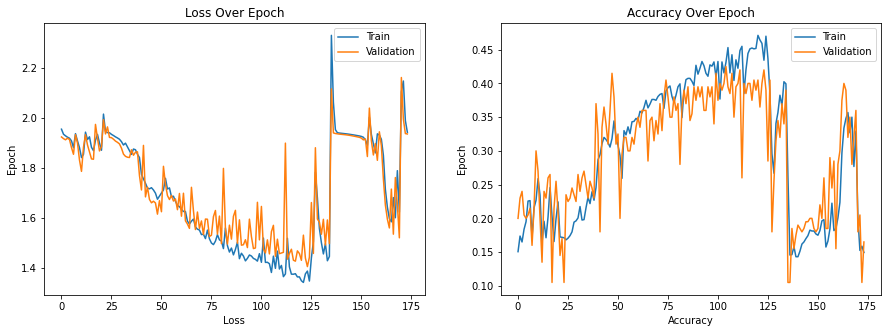

001-128-300-8
Epoch 1/300
13/13 [==============================] - 8s 651ms/step - loss: 1.9607 - accuracy: 0.1531 - val_loss: 1.9448 - val_accuracy: 0.1750
Epoch 2/300
13/13 [==============================] - 3s 262ms/step - loss: 1.9349 - accuracy: 0.1631 - val_loss: 1.9215 - val_accuracy: 0.2300
Epoch 3/300
13/13 [==============================] - 3s 261ms/step - loss: 1.9285 - accuracy: 0.1600 - val_loss: 1.9192 - val_accuracy: 0.1600
Epoch 4/300
13/13 [==============================] - 3s 260ms/step - loss: 1.9248 - accuracy: 0.1744 - val_loss: 1.9182 - val_accuracy: 0.1600
Epoch 5/300
13/13 [==============================] - 3s 262ms/step - loss: 1.9163 - accuracy: 0.1869 - val_loss: 1.9062 - val_accuracy: 0.1900
Epoch 6/300
13/13 [==============================] - 3s 262ms/step - loss: 1.9098 - accuracy: 0.2050 - val_loss: 1.9023 - val_accuracy: 0.1900
Epoch 7/300
13/13 [==============================] - 3s 262ms/step - loss: 1.9169 - accuracy: 0.1944 - val_loss: 1.9014 - val_ac

Epoch 58/300
13/13 [==============================] - 3s 263ms/step - loss: 1.9373 - accuracy: 0.1469 - val_loss: 1.9264 - val_accuracy: 0.1800
Epoch 59/300
13/13 [==============================] - 3s 263ms/step - loss: 1.9365 - accuracy: 0.1481 - val_loss: 1.9271 - val_accuracy: 0.1800
Epoch 60/300
13/13 [==============================] - 3s 262ms/step - loss: 1.9359 - accuracy: 0.1494 - val_loss: 1.9268 - val_accuracy: 0.1850
Epoch 61/300
13/13 [==============================] - 3s 260ms/step - loss: 1.9353 - accuracy: 0.1594 - val_loss: 1.9261 - val_accuracy: 0.1800
Epoch 62/300
13/13 [==============================] - 3s 261ms/step - loss: 1.9347 - accuracy: 0.1663 - val_loss: 1.9253 - val_accuracy: 0.1900
Epoch 63/300
13/13 [==============================] - 3s 262ms/step - loss: 1.9341 - accuracy: 0.1700 - val_loss: 1.9244 - val_accuracy: 0.2000
Epoch 64/300
13/13 [==============================] - 3s 264ms/step - loss: 1.9335 - accuracy: 0.1694 - val_loss: 1.9234 - val_accuracy:

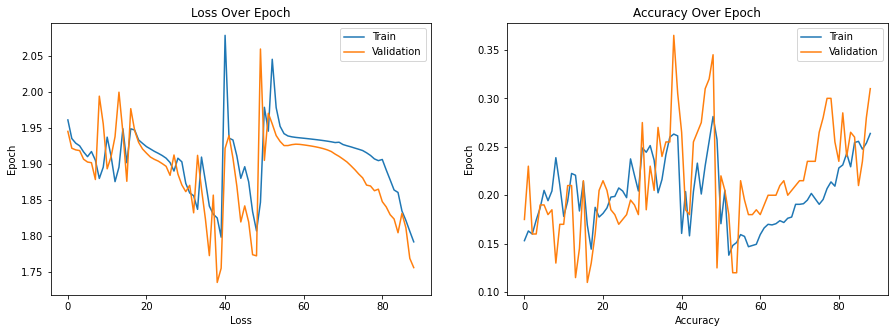

001-16-300-8


KeyError: 'train-16'

In [13]:
test_hyperparameters()

In [4]:
base_hyperparameters = {
    'learning_rate': 0.001,
    'batch_size': 16,
    'epochs': 300,
    'lstm_hidden_units': 8
}

# learning_rate_vals = [0.0001, 0.001, 0.01]
batch_size_vals = [16]
lstm_hidden_units_vals = [64, 256]

dsets = {}

for batch_size in batch_size_vals:
    dsets[f'train-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/train_dset-{batch_size}',
                                                             (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                              tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

    dsets[f'val-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/val_dset-{batch_size}',
                                                           (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                            tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

    dsets[f'test-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/test_dset-{batch_size}',
                                                            (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                             tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

In [5]:
def run_model(hyperparameters):
    lr_str = str(hyperparameters['learning_rate'])[2:]
    hyperparameter_string = f"{lr_str}-{hyperparameters['batch_size']}-{hyperparameters['epochs']}-{hyperparameters['lstm_hidden_units']}"
    print(hyperparameter_string)

    np.random.seed(0)
    tf.random.set_seed(0)

    num_hidden_units = hyperparameters['lstm_hidden_units']
    num_outputs = 7

    model = tf.keras.Sequential([
            tf.keras.Input(shape=(300, 171)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units,return_sequences=True)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units)),
            tf.keras.layers.Dense(num_outputs,activation='softmax')
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate'])
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    train_dset = dsets[f"train-{hyperparameters['batch_size']}"]
    val_dset = dsets[f"val-{hyperparameters['batch_size']}"]
    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=50, verbose=1)
    history = model.fit(train_dset,epochs=hyperparameters['epochs'],validation_data = val_dset,callbacks=[es])
    model.save(f"../models/model-{hyperparameter_string}")

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label="Train")
    plt.plot(history.history['val_loss'], label="Validation")
    plt.title("Loss Over Epoch")
    plt.xlabel("Loss")
    plt.ylabel("Epoch")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label="Train")
    plt.plot(history.history['val_accuracy'], label="Validation")
    plt.title("Accuracy Over Epoch")
    plt.xlabel("Accuracy")
    plt.ylabel("Epoch")
    plt.legend()
    plt.savefig(f"../models/loss-accuracy-{hyperparameter_string}.png")
    plt.show()

    plt.close()

def test_hyperparameters():
#     for learning_rate in learning_rate_vals:
#         hyperparameters = copy.deepcopy(base_hyperparameters)
#         hyperparameters['learning_rate'] = learning_rate
#         run_model(hyperparameters)

#     for batch_size in batch_size_vals:
#         hyperparameters = copy.deepcopy(base_hyperparameters)
#         hyperparameters['batch_size'] = batch_size
#         run_model(hyperparameters)

    for lstm_hidden_units in lstm_hidden_units_vals:
        hyperparameters = copy.deepcopy(base_hyperparameters)
        hyperparameters['lstm_hidden_units'] = lstm_hidden_units
        run_model(hyperparameters)

001-16-300-64
Epoch 1/300
100/100 [==============================] - 26s 261ms/step - loss: 1.9636 - accuracy: 0.1663 - val_loss: 1.9686 - val_accuracy: 0.1150
Epoch 2/300
100/100 [==============================] - 25s 249ms/step - loss: 1.9314 - accuracy: 0.1694 - val_loss: 1.9448 - val_accuracy: 0.1100
Epoch 3/300
100/100 [==============================] - 25s 250ms/step - loss: 1.9322 - accuracy: 0.1838 - val_loss: 1.9361 - val_accuracy: 0.1600
Epoch 4/300
100/100 [==============================] - 25s 249ms/step - loss: 1.9085 - accuracy: 0.1900 - val_loss: 1.9071 - val_accuracy: 0.1550
Epoch 5/300
100/100 [==============================] - 25s 249ms/step - loss: 1.8611 - accuracy: 0.2344 - val_loss: 1.8382 - val_accuracy: 0.2000
Epoch 6/300
100/100 [==============================] - 25s 249ms/step - loss: 1.8045 - accuracy: 0.2562 - val_loss: 1.7820 - val_accuracy: 0.2050
Epoch 7/300
100/100 [==============================] - 25s 249ms/step - loss: 1.8855 - accuracy: 0.2212 - val_

Epoch 57/300
100/100 [==============================] - 25s 249ms/step - loss: 0.9722 - accuracy: 0.6363 - val_loss: 1.1745 - val_accuracy: 0.6150
Epoch 58/300
100/100 [==============================] - 25s 249ms/step - loss: 0.9254 - accuracy: 0.6538 - val_loss: 1.2873 - val_accuracy: 0.5200
Epoch 59/300
100/100 [==============================] - 25s 249ms/step - loss: 0.9266 - accuracy: 0.6488 - val_loss: 1.1466 - val_accuracy: 0.6050
Epoch 60/300
100/100 [==============================] - 25s 248ms/step - loss: 0.8955 - accuracy: 0.6700 - val_loss: 1.1583 - val_accuracy: 0.5850
Epoch 61/300
100/100 [==============================] - 25s 249ms/step - loss: 0.8281 - accuracy: 0.6925 - val_loss: 1.1405 - val_accuracy: 0.6300
Epoch 62/300
100/100 [==============================] - 25s 249ms/step - loss: 0.8071 - accuracy: 0.7031 - val_loss: 1.2022 - val_accuracy: 0.5650
Epoch 63/300
100/100 [==============================] - 25s 249ms/step - loss: 0.8581 - accuracy: 0.6869 - val_loss: 1

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



100/100 [==============================] - 35s 355ms/step - loss: 2.0091 - accuracy: 0.1544 - val_loss: 1.9631 - val_accuracy: 0.1050
Epoch 2/300
100/100 [==============================] - 32s 322ms/step - loss: 1.9466 - accuracy: 0.1681 - val_loss: 1.9378 - val_accuracy: 0.1500
Epoch 3/300
100/100 [==============================] - 32s 322ms/step - loss: 1.9499 - accuracy: 0.1644 - val_loss: 1.9486 - val_accuracy: 0.1350
Epoch 4/300
100/100 [==============================] - 32s 322ms/step - loss: 1.9272 - accuracy: 0.1769 - val_loss: 1.9342 - val_accuracy: 0.1550
Epoch 5/300
100/100 [==============================] - 32s 323ms/step - loss: 1.9373 - accuracy: 0.1744 - val_loss: 1.9419 - val_accuracy: 0.1450
Epoch 6/300
100/100 [==============================] - 32s 322ms/step - loss: 1.9139 - accuracy: 0.1787 - val_loss: 1.9202 - val_accuracy: 0.1400
Epoch 7/300
100/100 [==============================] - 32s 322ms/step - loss: 1.8980 - accuracy: 0.2019 - val_loss: 1.8450 - val_accurac

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



100/100 [==============================] - 32s 322ms/step - loss: 1.0143 - accuracy: 0.6087 - val_loss: 1.2349 - val_accuracy: 0.5250
Epoch 46/300
100/100 [==============================] - 32s 322ms/step - loss: 0.9732 - accuracy: 0.6425 - val_loss: 1.2436 - val_accuracy: 0.5150
Epoch 47/300
100/100 [==============================] - 32s 322ms/step - loss: 0.9085 - accuracy: 0.6544 - val_loss: 1.2422 - val_accuracy: 0.5050
Epoch 48/300
100/100 [==============================] - 32s 322ms/step - loss: 0.9773 - accuracy: 0.6156 - val_loss: 1.1903 - val_accuracy: 0.5300
Epoch 49/300
100/100 [==============================] - 32s 322ms/step - loss: 0.9350 - accuracy: 0.6438 - val_loss: 1.1314 - val_accuracy: 0.5100
Epoch 50/300
100/100 [==============================] - 32s 322ms/step - loss: 0.9259 - accuracy: 0.6444 - val_loss: 1.1823 - val_accuracy: 0.5750
Epoch 51/300
100/100 [==============================] - 32s 322ms/step - loss: 0.8872 - accuracy: 0.6562 - val_loss: 1.0971 - val_a

Epoch 101/300
100/100 [==============================] - 32s 322ms/step - loss: 0.1453 - accuracy: 0.9563 - val_loss: 1.2044 - val_accuracy: 0.6600
Epoch 102/300
100/100 [==============================] - 32s 322ms/step - loss: 0.1688 - accuracy: 0.9456 - val_loss: 1.1252 - val_accuracy: 0.6600
Epoch 103/300
100/100 [==============================] - 32s 322ms/step - loss: 0.1215 - accuracy: 0.9712 - val_loss: 1.3745 - val_accuracy: 0.6250
Epoch 104/300
100/100 [==============================] - 32s 321ms/step - loss: 0.3434 - accuracy: 0.8844 - val_loss: 1.3348 - val_accuracy: 0.6300
Epoch 105/300
100/100 [==============================] - 32s 322ms/step - loss: 0.1474 - accuracy: 0.9531 - val_loss: 1.3451 - val_accuracy: 0.6350
Epoch 106/300
100/100 [==============================] - 32s 322ms/step - loss: 0.4053 - accuracy: 0.8606 - val_loss: 1.5925 - val_accuracy: 0.5750
Epoch 107/300
100/100 [==============================] - 32s 322ms/step - loss: 0.3862 - accuracy: 0.8644 - val_

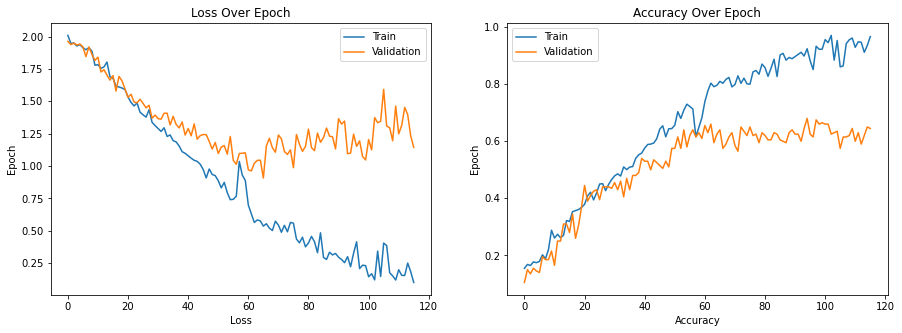

In [21]:
test_hyperparameters()

001-16-300-64
Epoch 1/300
100/100 [==============================] - 27s 265ms/step - loss: 1.9636 - accuracy: 0.1663 - val_loss: 1.9686 - val_accuracy: 0.1150
Epoch 2/300
100/100 [==============================] - 25s 249ms/step - loss: 1.9314 - accuracy: 0.1694 - val_loss: 1.9448 - val_accuracy: 0.1100
Epoch 3/300
100/100 [==============================] - 25s 248ms/step - loss: 1.9322 - accuracy: 0.1838 - val_loss: 1.9361 - val_accuracy: 0.1600
Epoch 4/300
100/100 [==============================] - 25s 250ms/step - loss: 1.9085 - accuracy: 0.1900 - val_loss: 1.9071 - val_accuracy: 0.1550
Epoch 5/300
100/100 [==============================] - 25s 249ms/step - loss: 1.8611 - accuracy: 0.2344 - val_loss: 1.8382 - val_accuracy: 0.2000
Epoch 6/300
100/100 [==============================] - 25s 249ms/step - loss: 1.8045 - accuracy: 0.2562 - val_loss: 1.7820 - val_accuracy: 0.2050
Epoch 7/300
100/100 [==============================] - 25s 250ms/step - loss: 1.8855 - accuracy: 0.2212 - val_

Epoch 60/300
100/100 [==============================] - 25s 251ms/step - loss: 0.8955 - accuracy: 0.6700 - val_loss: 1.1583 - val_accuracy: 0.5850
Epoch 61/300
100/100 [==============================] - 25s 251ms/step - loss: 0.8281 - accuracy: 0.6925 - val_loss: 1.1405 - val_accuracy: 0.6300
Epoch 62/300
 69/100 [===================>..........] - ETA: 7s - loss: 0.8079 - accuracy: 0.7056

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



100/100 [==============================] - 25s 249ms/step - loss: 0.5932 - accuracy: 0.7812 - val_loss: 1.0510 - val_accuracy: 0.6450
Epoch 103/300
100/100 [==============================] - 25s 251ms/step - loss: 0.7713 - accuracy: 0.7294 - val_loss: 1.2754 - val_accuracy: 0.5450
Epoch 104/300
100/100 [==============================] - 25s 251ms/step - loss: 0.6000 - accuracy: 0.7769 - val_loss: 1.1654 - val_accuracy: 0.5950
Epoch 105/300
100/100 [==============================] - 25s 251ms/step - loss: 0.5844 - accuracy: 0.7956 - val_loss: 1.1145 - val_accuracy: 0.6000
Epoch 106/300
100/100 [==============================] - 25s 251ms/step - loss: 0.5366 - accuracy: 0.8181 - val_loss: 1.3186 - val_accuracy: 0.5200
Epoch 107/300
100/100 [==============================] - 25s 249ms/step - loss: 0.5006 - accuracy: 0.8206 - val_loss: 1.2392 - val_accuracy: 0.5650
Epoch 108/300
100/100 [==============================] - 25s 251ms/step - loss: 0.5088 - accuracy: 0.8256 - val_loss: 1.3079 -

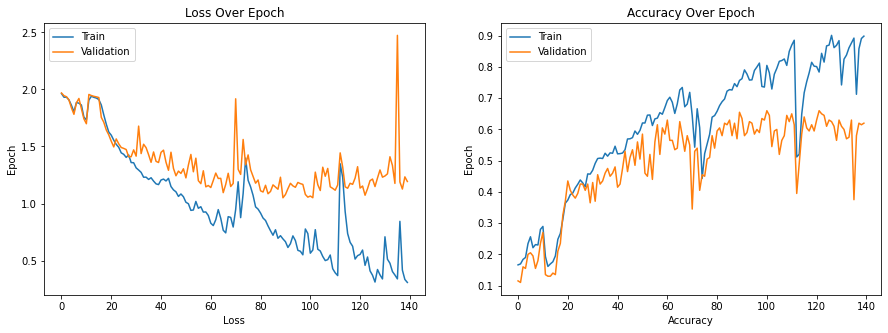

In [6]:
test_params = copy.deepcopy(base_hyperparameters)
test_params['lstm_hidden_units'] = 64
run_model(test_params)

# Initial Exploration Results

After exploration, it appeared that both 64 and 256 lstm hidden units obtained good results. Furthermore, batch size didn't have much of an effect, and the best learning rate early on was 0.001. However, there appears to be room to lower the learning rate as we move forward. Going to proceed with a higher batch rate to speed up training. Also going to try using a lower learning rate as 0.001 didn't work well for higher batch numbers.

In [13]:
base_hyperparameters = {
    'learning_rate': 0.0001,
    'batch_size': 128,
    'epochs': 300,
    'lstm_hidden_units': 8
}

dsets = {}

for batch_size in [16, 64, 128]:
    dsets[f'train-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/train_dset-{batch_size}',
                                                             (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                              tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

    dsets[f'val-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/val_dset-{batch_size}',
                                                           (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                            tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

    dsets[f'test-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/test_dset-{batch_size}',
                                                            (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                             tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

In [14]:
def run_model(hyperparameters):
    lr_str = str(hyperparameters['learning_rate'])[2:]
    hyperparameter_string = f"{lr_str}-{hyperparameters['batch_size']}-{hyperparameters['epochs']}-{hyperparameters['lstm_hidden_units']}"
    print(hyperparameter_string)

    np.random.seed(0)
    tf.random.set_seed(0)

    num_hidden_units = hyperparameters['lstm_hidden_units']
    num_outputs = 7

    model = tf.keras.Sequential([
            tf.keras.Input(shape=(300, 171)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units,return_sequences=True)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units)),
            tf.keras.layers.Dense(num_outputs,activation='softmax')
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate'])
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    train_dset = dsets[f"train-{hyperparameters['batch_size']}"]
    val_dset = dsets[f"val-{hyperparameters['batch_size']}"]
    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=50, verbose=1)
    history = model.fit(train_dset,epochs=hyperparameters['epochs'],validation_data = val_dset,callbacks=[es])
    model.save(f"../models/model-{hyperparameter_string}")

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label="Train")
    plt.plot(history.history['val_loss'], label="Validation")
    plt.title("Loss Over Epoch")
    plt.xlabel("Loss")
    plt.ylabel("Epoch")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label="Train")
    plt.plot(history.history['val_accuracy'], label="Validation")
    plt.title("Accuracy Over Epoch")
    plt.xlabel("Accuracy")
    plt.ylabel("Epoch")
    plt.legend()
    plt.savefig(f"../models/loss-accuracy-{hyperparameter_string}.png")
    plt.show()

    plt.close()

def test_hyperparameters():
    for learning_rate in learning_rate_vals:
        hyperparameters = copy.deepcopy(base_hyperparameters)
        hyperparameters['learning_rate'] = learning_rate
        run_model(hyperparameters)

    for batch_size in batch_size_vals:
        hyperparameters = copy.deepcopy(base_hyperparameters)
        hyperparameters['batch_size'] = batch_size
        run_model(hyperparameters)

    for lstm_hidden_units in lstm_hidden_units_vals:
        hyperparameters = copy.deepcopy(base_hyperparameters)
        hyperparameters['lstm_hidden_units'] = lstm_hidden_units
        run_model(hyperparameters)

0001-128-300-128
Epoch 1/300
13/13 [==============================] - 8s 617ms/step - loss: 1.9490 - accuracy: 0.1606 - val_loss: 1.9207 - val_accuracy: 0.2000
Epoch 2/300
13/13 [==============================] - 4s 306ms/step - loss: 1.9265 - accuracy: 0.1606 - val_loss: 1.9134 - val_accuracy: 0.2150
Epoch 3/300
13/13 [==============================] - 4s 305ms/step - loss: 1.9087 - accuracy: 0.1975 - val_loss: 1.8963 - val_accuracy: 0.2400
Epoch 4/300
13/13 [==============================] - 4s 306ms/step - loss: 1.8811 - accuracy: 0.2269 - val_loss: 1.8512 - val_accuracy: 0.2400
Epoch 5/300
13/13 [==============================] - 4s 307ms/step - loss: 1.8328 - accuracy: 0.2587 - val_loss: 1.8701 - val_accuracy: 0.2050
Epoch 6/300
13/13 [==============================] - 4s 308ms/step - loss: 1.8139 - accuracy: 0.2731 - val_loss: 1.7468 - val_accuracy: 0.2350
Epoch 7/300
13/13 [==============================] - 4s 308ms/step - loss: 1.7172 - accuracy: 0.3050 - val_loss: 1.6730 - val

Epoch 58/300
13/13 [==============================] - 4s 305ms/step - loss: 1.0714 - accuracy: 0.6087 - val_loss: 1.0827 - val_accuracy: 0.5950
Epoch 59/300
13/13 [==============================] - 4s 307ms/step - loss: 0.9452 - accuracy: 0.6469 - val_loss: 1.1131 - val_accuracy: 0.6100
Epoch 60/300
13/13 [==============================] - 4s 304ms/step - loss: 0.8969 - accuracy: 0.6731 - val_loss: 1.0685 - val_accuracy: 0.6150
Epoch 61/300
13/13 [==============================] - 4s 305ms/step - loss: 0.8476 - accuracy: 0.6837 - val_loss: 1.1091 - val_accuracy: 0.5850
Epoch 62/300
13/13 [==============================] - 4s 307ms/step - loss: 0.8419 - accuracy: 0.6888 - val_loss: 1.1435 - val_accuracy: 0.6100
Epoch 63/300
13/13 [==============================] - 5s 402ms/step - loss: 0.8647 - accuracy: 0.6888 - val_loss: 1.1959 - val_accuracy: 0.6100
Epoch 64/300
13/13 [==============================] - 4s 305ms/step - loss: 0.8851 - accuracy: 0.6775 - val_loss: 1.0882 - val_accuracy:

Epoch 115/300
13/13 [==============================] - 4s 307ms/step - loss: 0.6847 - accuracy: 0.7556 - val_loss: 1.1521 - val_accuracy: 0.5850
Epoch 116/300
13/13 [==============================] - 4s 306ms/step - loss: 0.6715 - accuracy: 0.7600 - val_loss: 1.0355 - val_accuracy: 0.6150
Epoch 117/300
13/13 [==============================] - 4s 307ms/step - loss: 0.6203 - accuracy: 0.7825 - val_loss: 0.9924 - val_accuracy: 0.6450
Epoch 118/300
13/13 [==============================] - 4s 307ms/step - loss: 0.5986 - accuracy: 0.7881 - val_loss: 1.1020 - val_accuracy: 0.5850
Epoch 119/300
13/13 [==============================] - 4s 306ms/step - loss: 0.8525 - accuracy: 0.6969 - val_loss: 1.0783 - val_accuracy: 0.6200
Epoch 120/300
13/13 [==============================] - 4s 306ms/step - loss: 0.6807 - accuracy: 0.7625 - val_loss: 1.0896 - val_accuracy: 0.5950
Epoch 121/300
13/13 [==============================] - 4s 307ms/step - loss: 0.6402 - accuracy: 0.7700 - val_loss: 1.0318 - val_ac

13/13 [==============================] - 4s 304ms/step - loss: 0.5594 - accuracy: 0.8037 - val_loss: 0.9660 - val_accuracy: 0.6450
Epoch 172/300
13/13 [==============================] - 4s 307ms/step - loss: 0.5618 - accuracy: 0.8044 - val_loss: 1.0661 - val_accuracy: 0.6250
Epoch 173/300
13/13 [==============================] - 4s 306ms/step - loss: 0.6415 - accuracy: 0.7812 - val_loss: 1.0527 - val_accuracy: 0.6000
Epoch 174/300
13/13 [==============================] - 4s 305ms/step - loss: 0.6635 - accuracy: 0.7700 - val_loss: 1.1357 - val_accuracy: 0.5900
Epoch 175/300
13/13 [==============================] - 4s 307ms/step - loss: 0.6805 - accuracy: 0.7575 - val_loss: 1.0880 - val_accuracy: 0.6200
Epoch 176/300
13/13 [==============================] - 4s 305ms/step - loss: 0.8334 - accuracy: 0.7113 - val_loss: 1.2464 - val_accuracy: 0.6000
Epoch 177/300
13/13 [==============================] - 4s 306ms/step - loss: 0.8528 - accuracy: 0.6869 - val_loss: 1.0441 - val_accuracy: 0.6100

13/13 [==============================] - 4s 304ms/step - loss: 0.3565 - accuracy: 0.8831 - val_loss: 0.9750 - val_accuracy: 0.7000
Epoch 228/300
13/13 [==============================] - 4s 306ms/step - loss: 0.3797 - accuracy: 0.8725 - val_loss: 1.0035 - val_accuracy: 0.6600
Epoch 229/300
13/13 [==============================] - 4s 309ms/step - loss: 0.3795 - accuracy: 0.8744 - val_loss: 1.0491 - val_accuracy: 0.6700
Epoch 230/300
13/13 [==============================] - 4s 306ms/step - loss: 0.4038 - accuracy: 0.8656 - val_loss: 0.9961 - val_accuracy: 0.6600
Epoch 231/300
13/13 [==============================] - 4s 307ms/step - loss: 0.5262 - accuracy: 0.8119 - val_loss: 1.0721 - val_accuracy: 0.6400
Epoch 232/300
13/13 [==============================] - 4s 304ms/step - loss: 0.4457 - accuracy: 0.8456 - val_loss: 1.0503 - val_accuracy: 0.6500
Epoch 233/300
13/13 [==============================] - 4s 305ms/step - loss: 0.3920 - accuracy: 0.8637 - val_loss: 1.0181 - val_accuracy: 0.6850

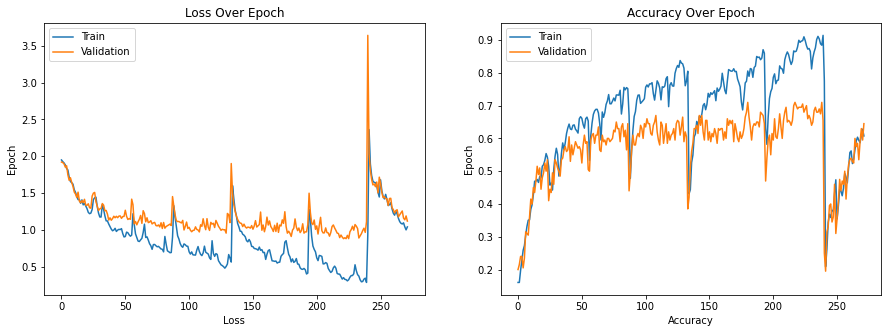

In [15]:
learning_rate_vals = []
batch_size_vals = []
lstm_hidden_units_vals = [128]

test_hyperparameters()

In [30]:
base_hyperparameters = {
    'learning_rate': 0.0005,
    'batch_size': 128,
    'epochs': 300,
    'lstm_hidden_units': 128,
    'decay': 0.96
}

dsets = {}

for batch_size in [16, 64, 128]:
    dsets[f'train-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/train_dset-{batch_size}',
                                                             (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                              tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

    dsets[f'val-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/val_dset-{batch_size}',
                                                           (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                            tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

    dsets[f'test-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/test_dset-{batch_size}',
                                                            (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                             tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

In [31]:
def run_model(hyperparameters):
    lr_str = str(hyperparameters['learning_rate'])[2:]
    hyperparameter_string = f"{lr_str}-{hyperparameters['batch_size']}-{hyperparameters['epochs']}-{hyperparameters['lstm_hidden_units']}-{hyperparameters['decay']}"
    print(hyperparameter_string)

    def scheduler(epoch, lr):
        new_lr = lr
        if epoch % 10 == 0 and epoch != 0:
            new_lr = lr * hyperparameters['decay']
        print(f"learning rate = {new_lr}")
        return new_lr

    np.random.seed(0)
    tf.random.set_seed(0)

    num_hidden_units = hyperparameters['lstm_hidden_units']
    num_outputs = 7

    model = tf.keras.Sequential([
            tf.keras.Input(shape=(300, 171)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units,return_sequences=True)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units)),
            tf.keras.layers.Dense(num_outputs,activation='softmax')
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate'])
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    train_dset = dsets[f"train-{hyperparameters['batch_size']}"]
    val_dset = dsets[f"val-{hyperparameters['batch_size']}"]
    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=50, verbose=1)
    lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)
    history = model.fit(train_dset,epochs=hyperparameters['epochs'],validation_data = val_dset,
                        callbacks=[es, lr_scheduler])
    model.save(f"../models/model-{hyperparameter_string}")

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label="Train")
    plt.plot(history.history['val_loss'], label="Validation")
    plt.title("Loss Over Epoch")
    plt.xlabel("Loss")
    plt.ylabel("Epoch")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label="Train")
    plt.plot(history.history['val_accuracy'], label="Validation")
    plt.title("Accuracy Over Epoch")
    plt.xlabel("Accuracy")
    plt.ylabel("Epoch")
    plt.legend()
    plt.savefig(f"../models/loss-accuracy-{hyperparameter_string}.png")
    plt.show()

    plt.close()

def test_hyperparameters():
#     for learning_rate in learning_rate_vals:
#         hyperparameters = copy.deepcopy(base_hyperparameters)
#         hyperparameters['learning_rate'] = learning_rate
#         run_model(hyperparameters)

#     for batch_size in batch_size_vals:
#         hyperparameters = copy.deepcopy(base_hyperparameters)
#         hyperparameters['batch_size'] = batch_size
#         run_model(hyperparameters)

#     for lstm_hidden_units in lstm_hidden_units_vals:
#         hyperparameters = copy.deepcopy(base_hyperparameters)
#         hyperparameters['lstm_hidden_units'] = lstm_hidden_units
#         run_model(hyperparameters)
    for decay in decay_vals:
        hyperparameters = copy.deepcopy(base_hyperparameters)
        hyperparameters['decay'] = decay
        run_model(hyperparameters)


0005-128-300-128-0.6
learning rate = 0.0005000000237487257
Epoch 1/300
13/13 [==============================] - 5s 411ms/step - loss: 1.9664 - accuracy: 0.1575 - val_loss: 1.9351 - val_accuracy: 0.1450
learning rate = 0.0005000000237487257
Epoch 2/300
13/13 [==============================] - 4s 309ms/step - loss: 1.9123 - accuracy: 0.1937 - val_loss: 1.8633 - val_accuracy: 0.2000
learning rate = 0.0005000000237487257
Epoch 3/300
13/13 [==============================] - 4s 307ms/step - loss: 1.8845 - accuracy: 0.2106 - val_loss: 1.8330 - val_accuracy: 0.2500
learning rate = 0.0005000000237487257
Epoch 4/300
13/13 [==============================] - 4s 308ms/step - loss: 1.8500 - accuracy: 0.2300 - val_loss: 1.9392 - val_accuracy: 0.2250
learning rate = 0.0005000000237487257
Epoch 5/300
13/13 [==============================] - 4s 311ms/step - loss: 1.9335 - accuracy: 0.1762 - val_loss: 1.9195 - val_accuracy: 0.1350
learning rate = 0.0005000000237487257
Epoch 6/300
13/13 [=================

learning rate = 6.479999865405262e-05
Epoch 46/300
13/13 [==============================] - 4s 306ms/step - loss: 1.2473 - accuracy: 0.5406 - val_loss: 1.2657 - val_accuracy: 0.5400
learning rate = 6.479999865405262e-05
Epoch 47/300
13/13 [==============================] - 4s 309ms/step - loss: 1.2236 - accuracy: 0.5462 - val_loss: 1.3081 - val_accuracy: 0.5350
learning rate = 6.479999865405262e-05
Epoch 48/300
13/13 [==============================] - 4s 305ms/step - loss: 1.2728 - accuracy: 0.5400 - val_loss: 1.4319 - val_accuracy: 0.4900
learning rate = 6.479999865405262e-05
Epoch 49/300
13/13 [==============================] - 4s 308ms/step - loss: 1.2484 - accuracy: 0.5475 - val_loss: 1.2671 - val_accuracy: 0.5800
learning rate = 6.479999865405262e-05
Epoch 50/300
13/13 [==============================] - 4s 308ms/step - loss: 1.2039 - accuracy: 0.5594 - val_loss: 1.2346 - val_accuracy: 0.5500
learning rate = 3.8879999192431565e-05
Epoch 51/300
13/13 [==============================]

learning rate = 5.038848212279845e-06
Epoch 91/300
13/13 [==============================] - 4s 306ms/step - loss: 0.9873 - accuracy: 0.6550 - val_loss: 1.1429 - val_accuracy: 0.5950
learning rate = 5.038848030380905e-06
Epoch 92/300
13/13 [==============================] - 4s 309ms/step - loss: 0.9859 - accuracy: 0.6556 - val_loss: 1.1609 - val_accuracy: 0.5800
learning rate = 5.038848030380905e-06
Epoch 93/300
13/13 [==============================] - 4s 308ms/step - loss: 0.9940 - accuracy: 0.6525 - val_loss: 1.1415 - val_accuracy: 0.5800
learning rate = 5.038848030380905e-06
Epoch 94/300
13/13 [==============================] - 4s 306ms/step - loss: 0.9908 - accuracy: 0.6550 - val_loss: 1.1325 - val_accuracy: 0.5950
learning rate = 5.038848030380905e-06
Epoch 95/300
13/13 [==============================] - 4s 308ms/step - loss: 0.9764 - accuracy: 0.6575 - val_loss: 1.1334 - val_accuracy: 0.5950
learning rate = 5.038848030380905e-06
Epoch 96/300
13/13 [==============================] 

learning rate = 6.530347036459716e-07
Epoch 136/300
13/13 [==============================] - 4s 305ms/step - loss: 0.9502 - accuracy: 0.6706 - val_loss: 1.1288 - val_accuracy: 0.5950
learning rate = 6.530347036459716e-07
Epoch 137/300
13/13 [==============================] - 4s 310ms/step - loss: 0.9518 - accuracy: 0.6712 - val_loss: 1.1344 - val_accuracy: 0.5950
learning rate = 6.530347036459716e-07
Epoch 138/300
13/13 [==============================] - 4s 309ms/step - loss: 0.9533 - accuracy: 0.6712 - val_loss: 1.1326 - val_accuracy: 0.5950
learning rate = 6.530347036459716e-07
Epoch 139/300
13/13 [==============================] - 4s 307ms/step - loss: 0.9513 - accuracy: 0.6737 - val_loss: 1.1302 - val_accuracy: 0.5950
learning rate = 6.530347036459716e-07
Epoch 140/300
13/13 [==============================] - 4s 308ms/step - loss: 0.9508 - accuracy: 0.6712 - val_loss: 1.1300 - val_accuracy: 0.5950
learning rate = 3.9182082218758295e-07
Epoch 141/300
13/13 [=========================

13/13 [==============================] - 4s 309ms/step - loss: 0.9477 - accuracy: 0.6731 - val_loss: 1.1281 - val_accuracy: 0.5950
Epoch 00180: early stopping
INFO:tensorflow:Assets written to: ../models/model-0005-128-300-128-0.6/assets


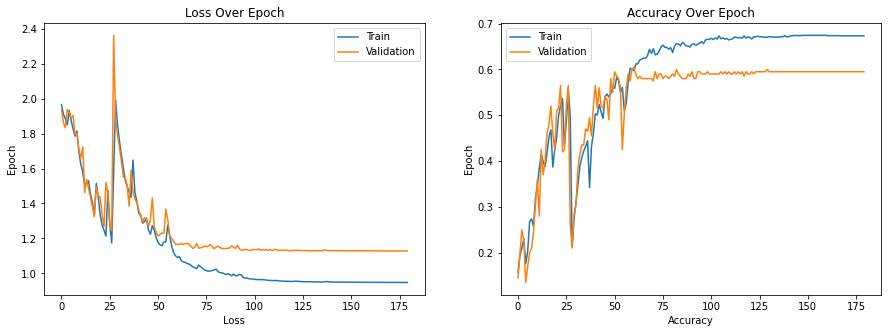

0005-128-300-128-0.8
learning rate = 0.0005000000237487257
Epoch 1/300
13/13 [==============================] - 5s 413ms/step - loss: 1.9664 - accuracy: 0.1575 - val_loss: 1.9351 - val_accuracy: 0.1450
learning rate = 0.0005000000237487257
Epoch 2/300
13/13 [==============================] - 4s 308ms/step - loss: 1.9123 - accuracy: 0.1937 - val_loss: 1.8633 - val_accuracy: 0.2000
learning rate = 0.0005000000237487257
Epoch 3/300
13/13 [==============================] - 4s 308ms/step - loss: 1.8399 - accuracy: 0.2456 - val_loss: 1.7933 - val_accuracy: 0.2600
learning rate = 0.0005000000237487257
Epoch 4/300
13/13 [==============================] - 4s 307ms/step - loss: 1.9561 - accuracy: 0.2069 - val_loss: 1.9074 - val_accuracy: 0.2450
learning rate = 0.0005000000237487257
Epoch 5/300
13/13 [==============================] - 4s 307ms/step - loss: 1.9458 - accuracy: 0.1881 - val_loss: 1.9492 - val_accuracy: 0.1050
learning rate = 0.0005000000237487257
Epoch 6/300
13/13 [=================

learning rate = 0.00020480001694522798
Epoch 46/300
13/13 [==============================] - 4s 308ms/step - loss: 0.9782 - accuracy: 0.6369 - val_loss: 1.1147 - val_accuracy: 0.6300
learning rate = 0.00020480001694522798
Epoch 47/300
13/13 [==============================] - 4s 307ms/step - loss: 0.9095 - accuracy: 0.6581 - val_loss: 1.1116 - val_accuracy: 0.6050
learning rate = 0.00020480001694522798
Epoch 48/300
13/13 [==============================] - 4s 306ms/step - loss: 0.8624 - accuracy: 0.6906 - val_loss: 1.0859 - val_accuracy: 0.6200
learning rate = 0.00020480001694522798
Epoch 49/300
13/13 [==============================] - 4s 308ms/step - loss: 0.8127 - accuracy: 0.7038 - val_loss: 1.0625 - val_accuracy: 0.6250
learning rate = 0.00020480001694522798
Epoch 50/300
13/13 [==============================] - 4s 306ms/step - loss: 0.8349 - accuracy: 0.7019 - val_loss: 1.1774 - val_accuracy: 0.5850
learning rate = 0.00016384001355618238
Epoch 51/300
13/13 [==========================

learning rate = 6.710886955261231e-05
Epoch 91/300
13/13 [==============================] - 4s 311ms/step - loss: 0.5899 - accuracy: 0.7994 - val_loss: 0.9659 - val_accuracy: 0.6600
learning rate = 6.710887100780383e-05
Epoch 92/300
13/13 [==============================] - 4s 305ms/step - loss: 0.5380 - accuracy: 0.8181 - val_loss: 0.9835 - val_accuracy: 0.6750
learning rate = 6.710887100780383e-05
Epoch 93/300
13/13 [==============================] - 4s 308ms/step - loss: 0.5185 - accuracy: 0.8313 - val_loss: 0.9986 - val_accuracy: 0.6750
learning rate = 6.710887100780383e-05
Epoch 94/300
13/13 [==============================] - 4s 309ms/step - loss: 0.5011 - accuracy: 0.8350 - val_loss: 0.9717 - val_accuracy: 0.6800
learning rate = 6.710887100780383e-05
Epoch 95/300
13/13 [==============================] - 4s 307ms/step - loss: 0.5387 - accuracy: 0.8156 - val_loss: 0.9639 - val_accuracy: 0.6650
learning rate = 6.710887100780383e-05
Epoch 96/300
13/13 [==============================] 

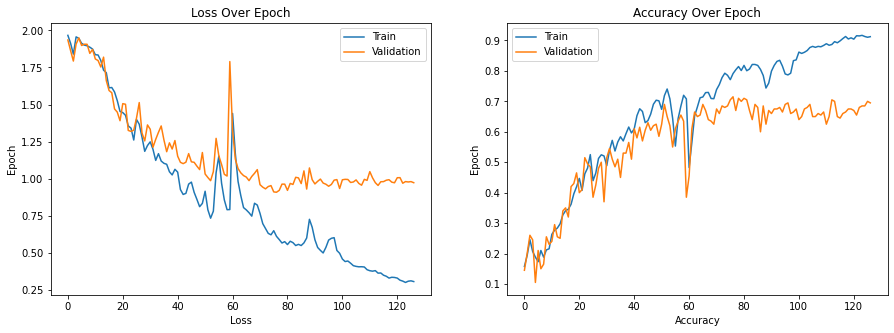

0005-128-300-128-0.96
learning rate = 0.0005000000237487257
Epoch 1/300
13/13 [==============================] - 5s 411ms/step - loss: 1.9664 - accuracy: 0.1575 - val_loss: 1.9351 - val_accuracy: 0.1450
learning rate = 0.0005000000237487257
Epoch 2/300
13/13 [==============================] - 4s 308ms/step - loss: 1.9123 - accuracy: 0.1937 - val_loss: 1.8633 - val_accuracy: 0.2000
learning rate = 0.0005000000237487257
Epoch 3/300
13/13 [==============================] - 4s 307ms/step - loss: 1.8458 - accuracy: 0.2313 - val_loss: 1.8540 - val_accuracy: 0.2550
learning rate = 0.0005000000237487257
Epoch 4/300
13/13 [==============================] - 4s 308ms/step - loss: 1.8587 - accuracy: 0.2294 - val_loss: 1.8133 - val_accuracy: 0.2400
learning rate = 0.0005000000237487257
Epoch 5/300
13/13 [==============================] - 4s 307ms/step - loss: 1.8584 - accuracy: 0.2331 - val_loss: 1.7976 - val_accuracy: 0.3100
learning rate = 0.0005000000237487257
Epoch 6/300
13/13 [================

learning rate = 0.0004246732860337943
Epoch 46/300
13/13 [==============================] - 4s 306ms/step - loss: 0.9341 - accuracy: 0.6712 - val_loss: 1.0620 - val_accuracy: 0.6350
learning rate = 0.0004246732860337943
Epoch 47/300
13/13 [==============================] - 4s 306ms/step - loss: 0.9903 - accuracy: 0.6350 - val_loss: 1.0893 - val_accuracy: 0.6100
learning rate = 0.0004246732860337943
Epoch 48/300
13/13 [==============================] - 4s 305ms/step - loss: 0.9370 - accuracy: 0.6562 - val_loss: 1.1808 - val_accuracy: 0.5950
learning rate = 0.0004246732860337943
Epoch 49/300
13/13 [==============================] - 4s 304ms/step - loss: 0.9171 - accuracy: 0.6681 - val_loss: 1.0539 - val_accuracy: 0.6550
learning rate = 0.0004246732860337943
Epoch 50/300
13/13 [==============================] - 4s 308ms/step - loss: 0.9171 - accuracy: 0.6675 - val_loss: 1.2359 - val_accuracy: 0.5850
learning rate = 0.00040768635459244247
Epoch 51/300
13/13 [==============================]

learning rate = 0.00034626698121428487
Epoch 91/300
13/13 [==============================] - 4s 308ms/step - loss: 0.6807 - accuracy: 0.7469 - val_loss: 0.9384 - val_accuracy: 0.6500
learning rate = 0.00034626698470674455
Epoch 92/300
13/13 [==============================] - 4s 307ms/step - loss: 0.5295 - accuracy: 0.8388 - val_loss: 0.9201 - val_accuracy: 0.7000
learning rate = 0.00034626698470674455
Epoch 93/300
13/13 [==============================] - 4s 308ms/step - loss: 0.4917 - accuracy: 0.8263 - val_loss: 0.9575 - val_accuracy: 0.6900
learning rate = 0.00034626698470674455
Epoch 94/300
13/13 [==============================] - 4s 306ms/step - loss: 0.4310 - accuracy: 0.8600 - val_loss: 0.9212 - val_accuracy: 0.6900
learning rate = 0.00034626698470674455
Epoch 95/300
13/13 [==============================] - 4s 308ms/step - loss: 0.3982 - accuracy: 0.8650 - val_loss: 0.9079 - val_accuracy: 0.6800
learning rate = 0.00034626698470674455
Epoch 96/300
13/13 [==========================

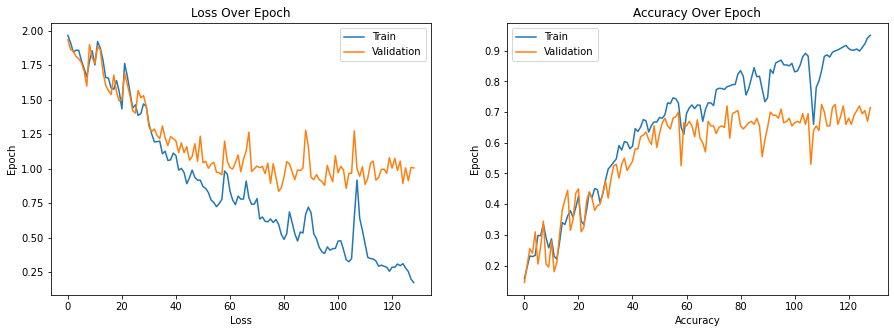

In [32]:
learning_rate_vals = []
batch_size_vals = []
lstm_hidden_units_vals = []
decay_vals = [0.6, 0.8, 0.96]

test_hyperparameters()

# Regularization

In [35]:
base_hyperparameters = {
    'learning_rate': 0.0005,
    'batch_size': 128,
    'epochs': 300,
    'lstm_hidden_units': 128,
    'decay': 0.8
}

dsets = {}

for batch_size in [16, 64, 128]:
    dsets[f'train-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/train_dset-{batch_size}',
                                                             (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                              tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

    dsets[f'val-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/val_dset-{batch_size}',
                                                           (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                            tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

    dsets[f'test-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/test_dset-{batch_size}',
                                                            (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                             tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

In [39]:
def run_model(hyperparameters):
    lr_str = str(hyperparameters['learning_rate'])[2:]
    hyperparameter_string = f"{lr_str}-{hyperparameters['batch_size']}-{hyperparameters['epochs']}-{hyperparameters['lstm_hidden_units']}-{hyperparameters['decay']}-l2reg"
    print(hyperparameter_string)

    def scheduler(epoch, lr):
        new_lr = lr
        if epoch % 10 == 0 and epoch != 0:
            new_lr = lr * hyperparameters['decay']
        print(f"learning rate = {new_lr}")
        return new_lr

    np.random.seed(0)
    tf.random.set_seed(0)

    num_hidden_units = hyperparameters['lstm_hidden_units']
    num_outputs = 7

    model = tf.keras.Sequential([
            tf.keras.Input(shape=(300, 171)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units,return_sequences=True,kernel_regularizer='l2')),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units,kernel_regularizer='l2')),
            tf.keras.layers.Dense(num_outputs,activation='softmax')
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate'])
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    train_dset = dsets[f"train-{hyperparameters['batch_size']}"]
    val_dset = dsets[f"val-{hyperparameters['batch_size']}"]
    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=50, verbose=1)
    lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)
    history = model.fit(train_dset,epochs=hyperparameters['epochs'],validation_data = val_dset,
                        callbacks=[es, lr_scheduler])
    model.save(f"../models/model-{hyperparameter_string}")

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label="Train")
    plt.plot(history.history['val_loss'], label="Validation")
    plt.title("Loss Over Epoch")
    plt.xlabel("Loss")
    plt.ylabel("Epoch")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label="Train")
    plt.plot(history.history['val_accuracy'], label="Validation")
    plt.title("Accuracy Over Epoch")
    plt.xlabel("Accuracy")
    plt.ylabel("Epoch")
    plt.legend()
    plt.savefig(f"../models/loss-accuracy-{hyperparameter_string}.png")
    plt.show()

    plt.close()

0005-128-300-128-0.8-l2reg
learning rate = 0.0005000000237487257
Epoch 1/300
13/13 [==============================] - 5s 412ms/step - loss: 12.9630 - accuracy: 0.1594 - val_loss: 11.8127 - val_accuracy: 0.1300
learning rate = 0.0005000000237487257
Epoch 2/300
13/13 [==============================] - 4s 305ms/step - loss: 10.9749 - accuracy: 0.1850 - val_loss: 9.9756 - val_accuracy: 0.1800
learning rate = 0.0005000000237487257
Epoch 3/300
13/13 [==============================] - 4s 306ms/step - loss: 9.3014 - accuracy: 0.1925 - val_loss: 8.5106 - val_accuracy: 0.1950
learning rate = 0.0005000000237487257
Epoch 4/300
13/13 [==============================] - 4s 306ms/step - loss: 7.9719 - accuracy: 0.1863 - val_loss: 7.3042 - val_accuracy: 0.2000
learning rate = 0.0005000000237487257
Epoch 5/300
13/13 [==============================] - 4s 305ms/step - loss: 6.8366 - accuracy: 0.2163 - val_loss: 6.3123 - val_accuracy: 0.1650
learning rate = 0.0005000000237487257
Epoch 6/300
13/13 [========

learning rate = 0.00020480001694522798
Epoch 46/300
13/13 [==============================] - 4s 305ms/step - loss: 1.7717 - accuracy: 0.5350 - val_loss: 1.8537 - val_accuracy: 0.5650
learning rate = 0.00020480001694522798
Epoch 47/300
13/13 [==============================] - 4s 307ms/step - loss: 1.7469 - accuracy: 0.5394 - val_loss: 1.8302 - val_accuracy: 0.5450
learning rate = 0.00020480001694522798
Epoch 48/300
13/13 [==============================] - 4s 304ms/step - loss: 1.6924 - accuracy: 0.5756 - val_loss: 1.8179 - val_accuracy: 0.5700
learning rate = 0.00020480001694522798
Epoch 49/300
13/13 [==============================] - 4s 306ms/step - loss: 1.7217 - accuracy: 0.5681 - val_loss: 1.8705 - val_accuracy: 0.5600
learning rate = 0.00020480001694522798
Epoch 50/300
13/13 [==============================] - 4s 306ms/step - loss: 1.8145 - accuracy: 0.5231 - val_loss: 1.8453 - val_accuracy: 0.5100
learning rate = 0.00016384001355618238
Epoch 51/300
13/13 [==========================

learning rate = 6.710886955261231e-05
Epoch 91/300
13/13 [==============================] - 4s 305ms/step - loss: 1.2630 - accuracy: 0.7394 - val_loss: 1.4473 - val_accuracy: 0.6500
learning rate = 6.710887100780383e-05
Epoch 92/300
13/13 [==============================] - 4s 303ms/step - loss: 1.2131 - accuracy: 0.7500 - val_loss: 1.4452 - val_accuracy: 0.6450
learning rate = 6.710887100780383e-05
Epoch 93/300
13/13 [==============================] - 4s 304ms/step - loss: 1.2131 - accuracy: 0.7456 - val_loss: 1.4413 - val_accuracy: 0.6850
learning rate = 6.710887100780383e-05
Epoch 94/300
13/13 [==============================] - 4s 305ms/step - loss: 1.2728 - accuracy: 0.7169 - val_loss: 1.6339 - val_accuracy: 0.6250
learning rate = 6.710887100780383e-05
Epoch 95/300
13/13 [==============================] - 4s 307ms/step - loss: 1.3419 - accuracy: 0.6944 - val_loss: 1.5340 - val_accuracy: 0.6150
learning rate = 6.710887100780383e-05
Epoch 96/300
13/13 [==============================] 

13/13 [==============================] - 4s 302ms/step - loss: 1.0300 - accuracy: 0.8069 - val_loss: 1.3445 - val_accuracy: 0.7150
learning rate = 2.7487792976899073e-05
Epoch 136/300
13/13 [==============================] - 4s 303ms/step - loss: 1.0310 - accuracy: 0.8112 - val_loss: 1.3590 - val_accuracy: 0.7250
learning rate = 2.7487792976899073e-05
Epoch 137/300
13/13 [==============================] - 4s 304ms/step - loss: 1.0210 - accuracy: 0.8138 - val_loss: 1.3904 - val_accuracy: 0.6900
learning rate = 2.7487792976899073e-05
Epoch 138/300
13/13 [==============================] - 4s 306ms/step - loss: 1.0077 - accuracy: 0.8206 - val_loss: 1.3803 - val_accuracy: 0.7000
learning rate = 2.7487792976899073e-05
Epoch 139/300
13/13 [==============================] - 4s 305ms/step - loss: 1.0016 - accuracy: 0.8244 - val_loss: 1.3562 - val_accuracy: 0.7000
learning rate = 2.7487792976899073e-05
Epoch 140/300
13/13 [==============================] - 4s 303ms/step - loss: 0.9980 - accuracy

learning rate = 1.125899962062249e-05
Epoch 180/300
13/13 [==============================] - 4s 305ms/step - loss: 0.9070 - accuracy: 0.8575 - val_loss: 1.4123 - val_accuracy: 0.6750
learning rate = 9.007199696497992e-06
Epoch 181/300
13/13 [==============================] - 4s 305ms/step - loss: 0.9057 - accuracy: 0.8594 - val_loss: 1.4169 - val_accuracy: 0.6900
learning rate = 9.007199878396932e-06
Epoch 182/300
13/13 [==============================] - 4s 306ms/step - loss: 0.9143 - accuracy: 0.8606 - val_loss: 1.4418 - val_accuracy: 0.6850
learning rate = 9.007199878396932e-06
Epoch 183/300
13/13 [==============================] - 4s 304ms/step - loss: 0.9384 - accuracy: 0.8525 - val_loss: 1.4113 - val_accuracy: 0.6650
learning rate = 9.007199878396932e-06
Epoch 184/300
13/13 [==============================] - 4s 303ms/step - loss: 0.9276 - accuracy: 0.8550 - val_loss: 1.4014 - val_accuracy: 0.6950
learning rate = 9.007199878396932e-06
Epoch 185/300
13/13 [==========================

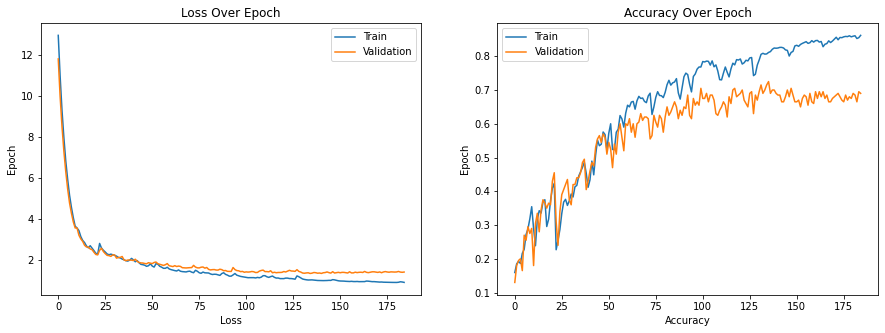

In [40]:
run_model(base_hyperparameters)

In [ ]:
base_hyperparameters = {
    'learning_rate': 0.0001,
    'batch_size': 128,
    'epochs': 300,
    'lstm_hidden_units': 128
}

def run_model(hyperparameters):
    lr_str = str(hyperparameters['learning_rate'])[2:]
    hyperparameter_string = f"{lr_str}-{hyperparameters['batch_size']}-{hyperparameters['epochs']}-{hyperparameters['lstm_hidden_units']}-l2reg"
    print(hyperparameter_string)

    np.random.seed(0)
    tf.random.set_seed(0)

    num_hidden_units = hyperparameters['lstm_hidden_units']
    num_outputs = 7

    model = tf.keras.Sequential([
            tf.keras.Input(shape=(300, 171)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units,return_sequences=True,kernel_regularizer='l2')),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units,kernel_regularizer='l2')),
            tf.keras.layers.Dense(num_outputs,activation='softmax')
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate'])
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    train_dset = dsets[f"train-{hyperparameters['batch_size']}"]
    val_dset = dsets[f"val-{hyperparameters['batch_size']}"]
    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=50, verbose=1)
    history = model.fit(train_dset,epochs=hyperparameters['epochs'],validation_data = val_dset,
                        callbacks=[es])
    model.save(f"../models/model-{hyperparameter_string}")

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label="Train")
    plt.plot(history.history['val_loss'], label="Validation")
    plt.title("Loss Over Epoch")
    plt.xlabel("Loss")
    plt.ylabel("Epoch")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label="Train")
    plt.plot(history.history['val_accuracy'], label="Validation")
    plt.title("Accuracy Over Epoch")
    plt.xlabel("Accuracy")
    plt.ylabel("Epoch")
    plt.legend()
    plt.savefig(f"../models/loss-accuracy-{hyperparameter_string}.png")
    plt.show()

    plt.close()

run_model(base_hyperparameters)

0001-128-300-128-l2reg
Epoch 1/300
13/13 [==============================] - 5s 414ms/step - loss: 13.6987 - accuracy: 0.1562 - val_loss: 13.4213 - val_accuracy: 0.2300
Epoch 2/300
13/13 [==============================] - 4s 308ms/step - loss: 13.2356 - accuracy: 0.1713 - val_loss: 12.9839 - val_accuracy: 0.2000
Epoch 3/300
13/13 [==============================] - 4s 304ms/step - loss: 12.7919 - accuracy: 0.1838 - val_loss: 12.5451 - val_accuracy: 0.2300
Epoch 4/300
13/13 [==============================] - 4s 305ms/step - loss: 12.3608 - accuracy: 0.2050 - val_loss: 12.1244 - val_accuracy: 0.2350
Epoch 5/300
13/13 [==============================] - 4s 303ms/step - loss: 11.9381 - accuracy: 0.2219 - val_loss: 11.6995 - val_accuracy: 0.2400
Epoch 6/300
13/13 [==============================] - 4s 304ms/step - loss: 11.5198 - accuracy: 0.2412 - val_loss: 11.4060 - val_accuracy: 0.1100
Epoch 7/300
13/13 [==============================] - 4s 305ms/step - loss: 11.2047 - accuracy: 0.2019 - val

13/13 [==============================] - 4s 305ms/step - loss: 6.8191 - accuracy: 0.2819 - val_loss: 6.7843 - val_accuracy: 0.3050
Epoch 58/300
13/13 [==============================] - 4s 305ms/step - loss: 6.7846 - accuracy: 0.2844 - val_loss: 6.7335 - val_accuracy: 0.3450
Epoch 59/300
13/13 [==============================] - 4s 305ms/step - loss: 6.7300 - accuracy: 0.3200 - val_loss: 6.7333 - val_accuracy: 0.3050
Epoch 60/300
13/13 [==============================] - 4s 307ms/step - loss: 6.7285 - accuracy: 0.3031 - val_loss: 6.6595 - val_accuracy: 0.3400
Epoch 61/300
13/13 [==============================] - 4s 304ms/step - loss: 6.6777 - accuracy: 0.3088 - val_loss: 6.6126 - val_accuracy: 0.3100
Epoch 62/300
13/13 [==============================] - 4s 304ms/step - loss: 6.6541 - accuracy: 0.3006 - val_loss: 6.5803 - val_accuracy: 0.3300
Epoch 63/300
13/13 [==============================] - 4s 305ms/step - loss: 6.6245 - accuracy: 0.3206 - val_loss: 6.5941 - val_accuracy: 0.3900
Epoch

Epoch 131/300
13/13 [==============================] - 4s 307ms/step - loss: 5.1532 - accuracy: 0.5244 - val_loss: 5.2352 - val_accuracy: 0.4950
Epoch 132/300
13/13 [==============================] - 4s 306ms/step - loss: 5.1323 - accuracy: 0.5194 - val_loss: 5.2268 - val_accuracy: 0.4850
Epoch 133/300
13/13 [==============================] - 4s 307ms/step - loss: 5.0922 - accuracy: 0.5362 - val_loss: 5.1679 - val_accuracy: 0.4950
Epoch 134/300
13/13 [==============================] - 4s 308ms/step - loss: 5.0515 - accuracy: 0.5550 - val_loss: 5.1528 - val_accuracy: 0.4900
Epoch 135/300
13/13 [==============================] - 4s 305ms/step - loss: 5.0455 - accuracy: 0.5381 - val_loss: 5.1668 - val_accuracy: 0.4850
Epoch 136/300
13/13 [==============================] - 4s 305ms/step - loss: 5.0407 - accuracy: 0.5431 - val_loss: 5.1055 - val_accuracy: 0.5100
Epoch 137/300
13/13 [==============================] - 4s 307ms/step - loss: 5.0109 - accuracy: 0.5556 - val_loss: 5.1172 - val_ac

13/13 [==============================] - 4s 306ms/step - loss: 4.6127 - accuracy: 0.5150 - val_loss: 4.5702 - val_accuracy: 0.5250
Epoch 188/300
13/13 [==============================] - 4s 305ms/step - loss: 4.4689 - accuracy: 0.5650 - val_loss: 4.4448 - val_accuracy: 0.5600
Epoch 189/300
13/13 [==============================] - 4s 303ms/step - loss: 4.3992 - accuracy: 0.5875 - val_loss: 4.4306 - val_accuracy: 0.6150
Epoch 190/300
13/13 [==============================] - 4s 305ms/step - loss: 4.3186 - accuracy: 0.6237 - val_loss: 4.4585 - val_accuracy: 0.5750
Epoch 191/300
13/13 [==============================] - 4s 305ms/step - loss: 4.2812 - accuracy: 0.6194 - val_loss: 4.3271 - val_accuracy: 0.6050
Epoch 192/300
13/13 [==============================] - 4s 304ms/step - loss: 4.1998 - accuracy: 0.6625 - val_loss: 4.3604 - val_accuracy: 0.6000
Epoch 193/300
13/13 [==============================] - 4s 307ms/step - loss: 4.1747 - accuracy: 0.6631 - val_loss: 4.2951 - val_accuracy: 0.6150

13/13 [==============================] - 4s 307ms/step - loss: 3.6119 - accuracy: 0.7063 - val_loss: 3.7966 - val_accuracy: 0.6550
Epoch 244/300
13/13 [==============================] - 4s 302ms/step - loss: 3.5902 - accuracy: 0.7212 - val_loss: 3.9257 - val_accuracy: 0.5950
Epoch 245/300
13/13 [==============================] - 4s 304ms/step - loss: 3.6220 - accuracy: 0.6981 - val_loss: 3.9587 - val_accuracy: 0.5900
Epoch 246/300
13/13 [==============================] - 4s 304ms/step - loss: 3.6658 - accuracy: 0.6800 - val_loss: 3.8417 - val_accuracy: 0.6350
Epoch 247/300
13/13 [==============================] - 4s 304ms/step - loss: 3.5726 - accuracy: 0.7163 - val_loss: 3.8396 - val_accuracy: 0.6200
Epoch 248/300
13/13 [==============================] - 4s 304ms/step - loss: 3.5204 - accuracy: 0.7262 - val_loss: 3.8415 - val_accuracy: 0.6350
Epoch 249/300
13/13 [==============================] - 4s 305ms/step - loss: 3.5115 - accuracy: 0.7406 - val_loss: 3.7357 - val_accuracy: 0.6700

13/13 [==============================] - 4s 308ms/step - loss: 3.0739 - accuracy: 0.7675 - val_loss: 3.3926 - val_accuracy: 0.6450
Epoch 300/300
13/13 [==============================] - 4s 308ms/step - loss: 3.0079 - accuracy: 0.7769 - val_loss: 3.3444 - val_accuracy: 0.6250


In [49]:
base_hyperparameters = {
    'learning_rate': 0.0005,
    'batch_size': 128,
    'epochs': 300,
    'lstm_hidden_units': 256,
    'decay': 0.8
}

dsets = {}

for batch_size in [16, 64, 128]:
    dsets[f'train-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/train_dset-{batch_size}',
                                                             (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                              tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

    dsets[f'val-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/val_dset-{batch_size}',
                                                           (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                            tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

    dsets[f'test-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/test_dset-{batch_size}',
                                                            (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                             tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

In [50]:
def run_model(hyperparameters):
    lr_str = str(hyperparameters['learning_rate'])[2:]
    hyperparameter_string = f"{lr_str}-{hyperparameters['batch_size']}-{hyperparameters['epochs']}-{hyperparameters['lstm_hidden_units']}-{hyperparameters['decay']}-l2reg"
    print(hyperparameter_string)

    def scheduler(epoch, lr):
        new_lr = lr
        if epoch % 10 == 0 and epoch != 0:
            new_lr = lr * hyperparameters['decay']
        print(f"learning rate = {new_lr}")
        return new_lr

    np.random.seed(0)
    tf.random.set_seed(0)

    num_hidden_units = hyperparameters['lstm_hidden_units']
    num_outputs = 7

    model = tf.keras.Sequential([
            tf.keras.Input(shape=(300, 171)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units,return_sequences=True,kernel_regularizer='l2')),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units,kernel_regularizer='l2')),
            tf.keras.layers.Dense(num_outputs,activation='softmax')
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate'])
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    train_dset = dsets[f"train-{hyperparameters['batch_size']}"]
    val_dset = dsets[f"val-{hyperparameters['batch_size']}"]
    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=50, verbose=1)
    lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)
    history = model.fit(train_dset,epochs=hyperparameters['epochs'],validation_data = val_dset,
                        callbacks=[es, lr_scheduler])
    model.save(f"../models/model-{hyperparameter_string}")

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label="Train")
    plt.plot(history.history['val_loss'], label="Validation")
    plt.title("Loss Over Epoch")
    plt.xlabel("Loss")
    plt.ylabel("Epoch")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label="Train")
    plt.plot(history.history['val_accuracy'], label="Validation")
    plt.title("Accuracy Over Epoch")
    plt.xlabel("Accuracy")
    plt.ylabel("Epoch")
    plt.legend()
    plt.savefig(f"../models/loss-accuracy-{hyperparameter_string}.png")
    plt.show()

    plt.close()

def test_hyperparameters():
    for decay in decay_vals:
        hyperparameters = copy.deepcopy(base_hyperparameters)
        hyperparameters['decay'] = decay
        run_model(hyperparameters)

0005-128-300-256-0.8-l2reg
learning rate = 0.0005000000237487257
Epoch 1/300
13/13 [==============================] - 8s 650ms/step - loss: 19.4646 - accuracy: 0.1363 - val_loss: 16.9571 - val_accuracy: 0.1500
learning rate = 0.0005000000237487257
Epoch 2/300
13/13 [==============================] - 7s 543ms/step - loss: 15.1928 - accuracy: 0.1731 - val_loss: 13.1928 - val_accuracy: 0.1650
learning rate = 0.0005000000237487257
Epoch 3/300
13/13 [==============================] - 7s 547ms/step - loss: 11.7953 - accuracy: 0.1981 - val_loss: 10.2069 - val_accuracy: 0.2200
learning rate = 0.0005000000237487257
Epoch 4/300
13/13 [==============================] - 7s 545ms/step - loss: 9.1693 - accuracy: 0.2381 - val_loss: 7.9598 - val_accuracy: 0.2650
learning rate = 0.0005000000237487257
Epoch 5/300
13/13 [==============================] - 7s 544ms/step - loss: 7.2113 - accuracy: 0.2556 - val_loss: 6.4742 - val_accuracy: 0.2600
learning rate = 0.0005000000237487257
Epoch 6/300
13/13 [=====

13/13 [==============================] - 7s 544ms/step - loss: 2.1906 - accuracy: 0.2338 - val_loss: 2.1670 - val_accuracy: 0.2050
learning rate = 0.00020480001694522798
Epoch 45/300
13/13 [==============================] - 7s 543ms/step - loss: 2.1582 - accuracy: 0.2488 - val_loss: 2.1602 - val_accuracy: 0.2200
learning rate = 0.00020480001694522798
Epoch 46/300
13/13 [==============================] - 7s 541ms/step - loss: 2.1295 - accuracy: 0.2688 - val_loss: 2.1139 - val_accuracy: 0.2800
learning rate = 0.00020480001694522798
Epoch 47/300
13/13 [==============================] - 7s 541ms/step - loss: 2.1600 - accuracy: 0.2444 - val_loss: 2.2122 - val_accuracy: 0.1700
learning rate = 0.00020480001694522798
Epoch 48/300
13/13 [==============================] - 7s 545ms/step - loss: 2.2094 - accuracy: 0.2119 - val_loss: 2.1768 - val_accuracy: 0.1800
learning rate = 0.00020480001694522798
Epoch 49/300
13/13 [==============================] - 7s 546ms/step - loss: 2.1557 - accuracy: 0.2

13/13 [==============================] - 7s 543ms/step - loss: 1.5038 - accuracy: 0.5144 - val_loss: 1.5495 - val_accuracy: 0.5100
learning rate = 6.710887100780383e-05
Epoch 100/300
13/13 [==============================] - 7s 544ms/step - loss: 1.4546 - accuracy: 0.5444 - val_loss: 1.5474 - val_accuracy: 0.4900
learning rate = 5.3687096806243065e-05
Epoch 101/300
13/13 [==============================] - 7s 545ms/step - loss: 1.4521 - accuracy: 0.5569 - val_loss: 1.6471 - val_accuracy: 0.4950
learning rate = 5.3687097533838823e-05
Epoch 102/300
13/13 [==============================] - 7s 544ms/step - loss: 1.4766 - accuracy: 0.5419 - val_loss: 1.6439 - val_accuracy: 0.4250
learning rate = 5.3687097533838823e-05
Epoch 103/300
13/13 [==============================] - 7s 542ms/step - loss: 1.4458 - accuracy: 0.5556 - val_loss: 1.5150 - val_accuracy: 0.5200
learning rate = 5.3687097533838823e-05
Epoch 104/300
13/13 [==============================] - 7s 546ms/step - loss: 1.5652 - accuracy:

learning rate = 2.1990234017721377e-05
Epoch 144/300
13/13 [==============================] - 7s 543ms/step - loss: 1.4213 - accuracy: 0.5806 - val_loss: 1.5371 - val_accuracy: 0.5350
learning rate = 2.1990234017721377e-05
Epoch 145/300
13/13 [==============================] - 7s 544ms/step - loss: 1.4208 - accuracy: 0.5813 - val_loss: 1.5203 - val_accuracy: 0.5350
learning rate = 2.1990234017721377e-05
Epoch 146/300
13/13 [==============================] - 7s 545ms/step - loss: 1.4119 - accuracy: 0.5844 - val_loss: 1.5280 - val_accuracy: 0.5150
learning rate = 2.1990234017721377e-05
Epoch 147/300
13/13 [==============================] - 7s 546ms/step - loss: 1.4177 - accuracy: 0.5781 - val_loss: 1.4941 - val_accuracy: 0.5350
learning rate = 2.1990234017721377e-05
Epoch 148/300
13/13 [==============================] - 7s 543ms/step - loss: 1.3970 - accuracy: 0.5981 - val_loss: 1.5143 - val_accuracy: 0.5300
learning rate = 2.1990234017721377e-05
Epoch 149/300
13/13 [====================

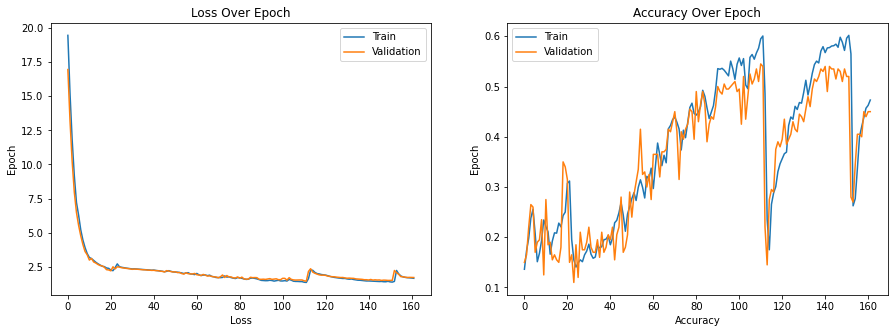

0005-128-300-256-0.9-l2reg
learning rate = 0.0005000000237487257
Epoch 1/300
13/13 [==============================] - 8s 644ms/step - loss: 19.4646 - accuracy: 0.1363 - val_loss: 16.9571 - val_accuracy: 0.1500
learning rate = 0.0005000000237487257
Epoch 2/300
13/13 [==============================] - 7s 546ms/step - loss: 15.1928 - accuracy: 0.1731 - val_loss: 13.1928 - val_accuracy: 0.1650
learning rate = 0.0005000000237487257
Epoch 3/300
13/13 [==============================] - 7s 547ms/step - loss: 11.7953 - accuracy: 0.1981 - val_loss: 10.2069 - val_accuracy: 0.2200
learning rate = 0.0005000000237487257
Epoch 4/300
13/13 [==============================] - 7s 546ms/step - loss: 9.1691 - accuracy: 0.2381 - val_loss: 7.9577 - val_accuracy: 0.2650
learning rate = 0.0005000000237487257
Epoch 5/300
13/13 [==============================] - 7s 543ms/step - loss: 7.2166 - accuracy: 0.2494 - val_loss: 6.6476 - val_accuracy: 0.2350
learning rate = 0.0005000000237487257
Epoch 6/300
13/13 [=====

KeyboardInterrupt: 

In [51]:
learning_rate_vals = []
batch_size_vals = []
lstm_hidden_units_vals = []
decay_vals = [0.8, 0.9, 0.96]

test_hyperparameters()

In [ ]:
learning_rate_vals = []
batch_size_vals = []
lstm_hidden_units_vals = []
decay_vals = [0.9, 0.96]

test_hyperparameters()